##STEP-1: DATASET LOADING

In [1]:
#IMPORT THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOAD THE DATASET USING PANDAS
df=pd.read_csv("/content/Sample - Superstore.csv")

#PRINT FIRST 5 ROWS OF THE DATASET
print (df.head(5))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  11-08-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  06-12-2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10-11-2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [3]:
#PRINT LAST 5 ROWS OF THE DATASET
print(df.tail(5))

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017  03-03-2017  Standard Class   
9993    9994  CA-2017-119914  05-04-2017  05-09-2017    Second Class   

     Customer ID     Customer Name   Segment        Country         City  ...  \
9989    TB-21400  Tom Boeckenhauer  Consumer  United States        Miami  ...   
9990    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9991    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9992    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9993    CC-12220      Chris Cortes  Consumer  United States  Westminster  ...   

     Postal Code  Region       Product ID         Category Sub-Category  \
9989 

In [4]:
#Check the following:
#Shape of the dataset
#Column names
#Data types using info()
print(f"1. The shape of the data is: {df.shape}")
print(f"2. The columns of the data are:{df.columns}")
print(f"3. The data structure and data types are described as:")
print(df.info())

1. The shape of the data is: (9994, 21)
2. The columns of the data are:Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
3. The data structure and data types are described as:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country     

##STEP-2: DATA CLEANING AND PREPROCESSING


In [5]:
#IDENTIFYING MISSING VALUES
print(df.isnull().sum())



Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Conclusion- There are no missing values as seen from the output

In [48]:
#CHECK FOR DUPLICATE RECORDS
df.duplicated().sum()


np.int64(0)

Conclusion- There are no duplicate records

In [7]:
#PRINT DATE AND NUMERICAL COLUMNS.
print(f"The date columns are: {df.columns[df.columns.str.contains('Date')]}")
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(f"The numerical columns are:{numerical_columns}")

The date columns are: Index(['Order Date', 'Ship Date'], dtype='object')
The numerical columns are:Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [8]:
#Convert data types where required:
#1.date columns to datetime
#2.Convert numerical columns to int/float (Numerical columns are already in int/float for our data)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=False)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed', dayfirst=False)
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [9]:
#STANDARDIZE COLUMN NAMES
df.columns = df.columns.str.upper()
print("Updated column names:")
print(df.columns)

Updated column names:
Index(['ROW ID', 'ORDER ID', 'ORDER DATE', 'SHIP DATE', 'SHIP MODE',
       'CUSTOMER ID', 'CUSTOMER NAME', 'SEGMENT', 'COUNTRY', 'CITY', 'STATE',
       'POSTAL CODE', 'REGION', 'PRODUCT ID', 'CATEGORY', 'SUB-CATEGORY',
       'PRODUCT NAME', 'SALES', 'QUANTITY', 'DISCOUNT', 'PROFIT'],
      dtype='object')


#STEP-3: EXPLORATORY DATA ANALYSIS

In [11]:
#Display Summary Statistics
df.describe()

,ROW ID,ORDER DATE,SHIP DATE,POSTAL CODE,SALES,QUANTITY,DISCOUNT,PROFIT
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [15]:
#Finding Value counts for categorical columns
print(df['CATEGORY'].value_counts())
print(df['REGION'].value_counts())
print(df['SEGMENT'].value_counts())
print(df['SHIP MODE'].value_counts())

CATEGORY
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
REGION
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64
SEGMENT
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64
SHIP MODE
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64


In [13]:
#Group-by analysis (e.g., average, total, count)

In [34]:
#CATEGORY-wise Sales & Profit (Total, Average, Count)
category_analysis = (
    df.groupby('CATEGORY')
    .agg(
        total_sales=('SALES', 'sum'),
        avg_sales=('SALES', 'mean'),
        total_profit=('PROFIT', 'sum'),
        avg_profit=('PROFIT', 'mean'),
        order_count=('ORDER ID', 'count')
    )
    .sort_values(by='total_sales', ascending=False)
)

category_analysis



,total_sales,avg_sales,total_profit,avg_profit,order_count
CATEGORY,,,,,
Technology,836154.0330,452.709276,145454.9481,78.752002,1847
Furniture,741999.7953,349.834887,18451.2728,8.699327,2121
Office Supplies,719047.0320,119.324101,122490.8008,20.327050,6026


In [35]:
#REGION-wise Performance
region_analysis = (
    df.groupby('REGION')
    .agg(
        total_sales=('SALES', 'sum'),
        total_profit=('PROFIT', 'sum'),
        avg_profit=('PROFIT', 'mean'),
        order_count=('ORDER ID', 'count')
    )
    .sort_values(by='total_sales', ascending=False)
)

region_analysis


,total_sales,total_profit,avg_profit,order_count
REGION,,,,
West,725457.8245,108418.4489,33.849032,3203
East,678781.2400,91522.7800,32.135808,2848
Central,501239.8908,39706.3625,17.092709,2323
South,391721.9050,46749.4303,28.857673,1620


In [36]:
#SEGMENT-wise Analysis
segment_analysis = (
    df.groupby('SEGMENT')
    .agg(
        total_sales=('SALES', 'sum'),
        total_profit=('PROFIT', 'sum'),
        avg_profit=('PROFIT', 'mean'),
        avg_discount=('DISCOUNT', 'mean'),
        order_count=('ORDER ID', 'count')
    )
    .sort_values(by='total_sales', ascending=False)
)

segment_analysis


,total_sales,total_profit,avg_profit,avg_discount,order_count
SEGMENT,,,,,
Consumer,1.161401e+06,134119.2092,25.836873,0.158141,5191
Corporate,7.061464e+05,91979.1340,30.456667,0.158228,3020
Home Office,4.296531e+05,60298.6785,33.818664,0.147128,1783


In [37]:
#SUB-CATEGORY Analysis
subcat_analysis = (
    df.groupby('SUB-CATEGORY')
    .agg(
        total_sales=('SALES', 'sum'),
        total_profit=('PROFIT', 'sum'),
        avg_profit=('PROFIT', 'mean'),
        order_count=('ORDER ID', 'count')
    )
    .sort_values(by='total_profit', ascending=False)
)

subcat_analysis


,total_sales,total_profit,avg_profit,order_count
SUB-CATEGORY,,,,
Copiers,149528.0300,55617.8249,817.909190,68
Phones,330007.0540,44515.7306,50.073938,889
Accessories,167380.3180,41936.6357,54.111788,775
Paper,78479.2060,34053.5693,24.856620,1370
Binders,203412.7330,30221.7633,19.843574,1523
Chairs,328449.1030,26590.1663,43.095894,617
Storage,223843.6080,21278.8264,25.152277,846
Appliances,107532.1610,18138.0054,38.922758,466
Furnishings,91705.1640,13059.1436,13.645918,957


In [38]:
#SHIPPING MODE vs PROFIT
ship_analysis = (
    df.groupby('SHIP MODE')
    .agg(
        total_sales=('SALES', 'sum'),
        total_profit=('PROFIT', 'sum'),
        avg_profit=('PROFIT', 'mean'),
        order_count=('ORDER ID', 'count')
    )
)

ship_analysis


,total_sales,total_profit,avg_profit,order_count
SHIP MODE,,,,
First Class,3.514284e+05,48969.8399,31.839948,1538
Same Day,1.283631e+05,15891.7589,29.266591,543
Second Class,4.591936e+05,57446.6354,29.535545,1945
Standard Class,1.358216e+06,164088.7875,27.494770,5968


In [39]:
#DISCOUNT IMPACT BY CATEGORY
discount_category = (
    df.groupby('CATEGORY')
    .agg(
        avg_discount=('DISCOUNT', 'mean'),
        avg_profit=('PROFIT', 'mean')
    )
)

discount_category


,avg_discount,avg_profit
CATEGORY,,
Furniture,0.173923,8.699327
Office Supplies,0.157285,20.327050
Technology,0.132323,78.752002


In [24]:
#Top & Bottom Categories by Sales
category_perf = (
    df.groupby('CATEGORY')[['SALES','PROFIT']]
    .sum()
    .sort_values(by='SALES', ascending=False)
)

category_perf


,SALES,PROFIT
CATEGORY,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


In [25]:
#Bottom performing category
category_perf.sort_values(by='SALES').head(1)


,SALES,PROFIT
CATEGORY,,
Office Supplies,719047.032,122490.8008


In [29]:
#Top Sub-Categories by Profit
subcat_profit = (
    df.groupby('SUB-CATEGORY')['PROFIT']
    .sum()
    .sort_values(ascending=False)
)

subcat_profit.head(5)




,PROFIT
SUB-CATEGORY,
Copiers,55617.8249
Phones,44515.7306
Accessories,41936.6357
Paper,34053.5693
Binders,30221.7633


In [28]:
# Bottom Sub-Categories by Profit
subcat_profit.tail(5)

,PROFIT
SUB-CATEGORY,
Machines,3384.7569
Fasteners,949.5182
Supplies,-1189.0995
Bookcases,-3472.5560
Tables,-17725.4811


In [19]:
# Correlation analysis between numerical columns
df[['SALES','QUANTITY','DISCOUNT','PROFIT']].corr()


,SALES,QUANTITY,DISCOUNT,PROFIT
SALES,1.000000,0.200795,-0.028190,0.479064
QUANTITY,0.200795,1.000000,0.008623,0.066253
DISCOUNT,-0.028190,0.008623,1.000000,-0.219487
PROFIT,0.479064,0.066253,-0.219487,1.000000


#Step 4: Data Visualization


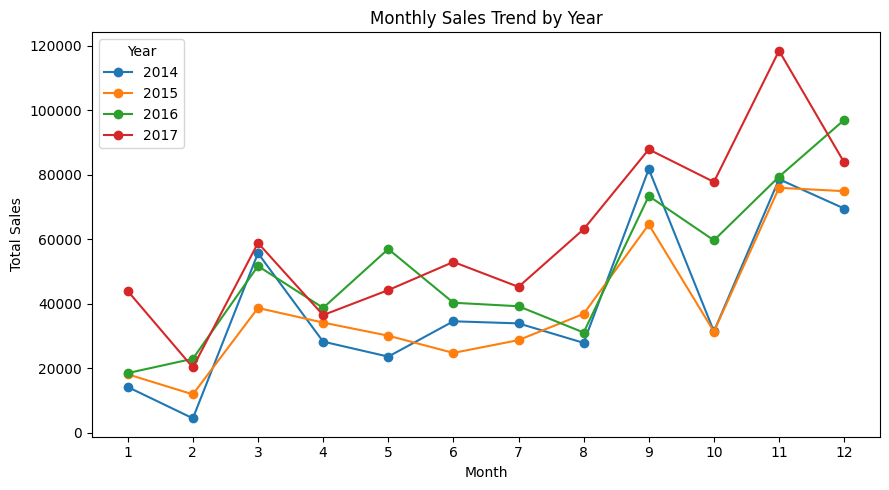

In [46]:
# MONTHLY SALES TREND


#Create Year & Month columns
df['ORDER YEAR'] = df['ORDER DATE'].dt.year
df['ORDER MONTH'] = df['ORDER DATE'].dt.month

# Aggregate monthly sales by year
year_month_sales = (
    df.groupby(['ORDER YEAR', 'ORDER MONTH'])['SALES']
    .sum()
    .reset_index()
)

year_month_sales

#Plot
plt.figure(figsize=(9,5))

for year in year_month_sales['ORDER YEAR'].unique():    #Gets all unique years (e.g., 2014, 2015, 2016) #Loops once per year
    yearly_data = year_month_sales[year_month_sales['ORDER YEAR'] == year]
    plt.plot(
        yearly_data['ORDER MONTH'],
        yearly_data['SALES'],
        marker='o',
        label=str(year)
    )

plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()



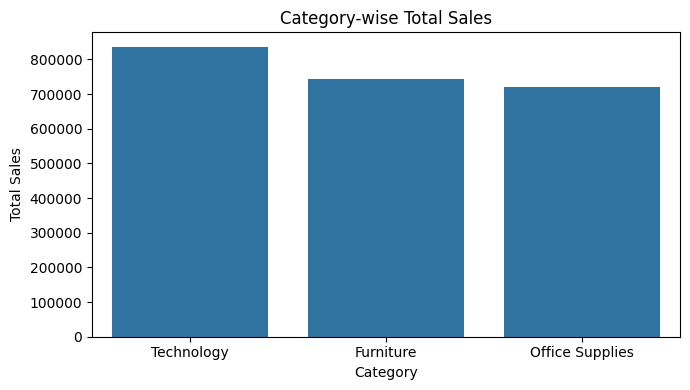

In [30]:
#Bar Chart – Category-wise comparison

plt.figure(figsize=(7,4))
sns.barplot(
    x=category_perf.index,
    y=category_perf['SALES'],
)
plt.title('Category-wise Total Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



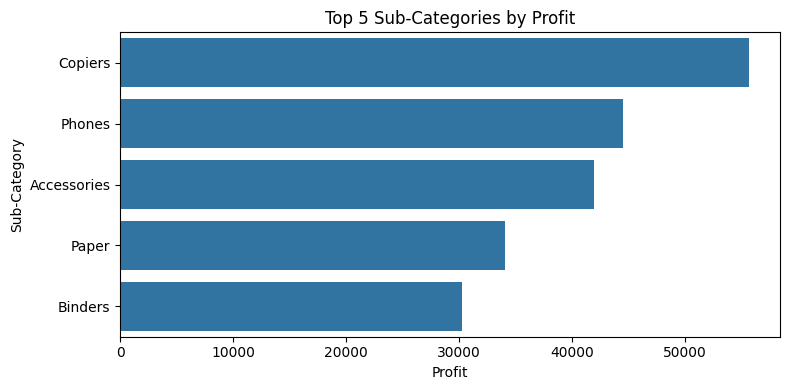

In [31]:
#Bar Chart – Profit by Sub-Category (Top 5)
plt.figure(figsize=(8,4))
sns.barplot(
    x=subcat_profit.head(5).values,
    y=subcat_profit.head(5).index,
)
plt.title('Top 5 Sub-Categories by Profit')
plt.xlabel('Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


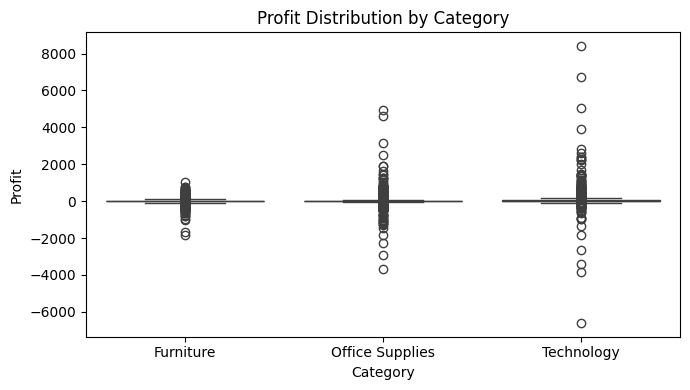

In [32]:
#Box Plot – Profit by Category (Outliers)
plt.figure(figsize=(7,4))
sns.boxplot(x='CATEGORY', y='PROFIT', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


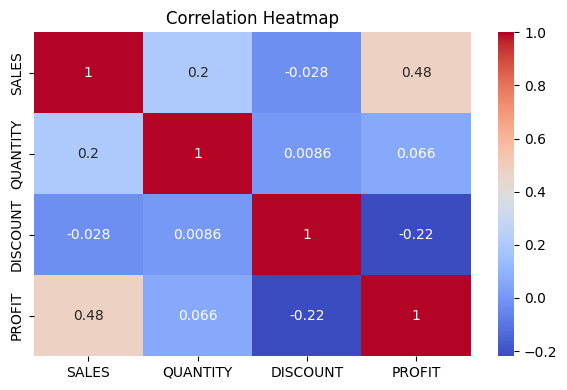

In [33]:
#Heatmap – Correlation
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['SALES','QUANTITY','DISCOUNT','PROFIT']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


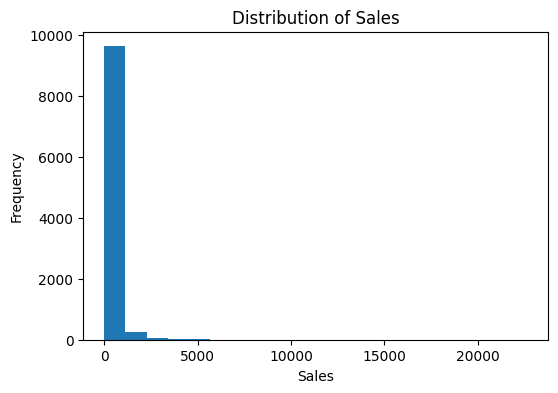

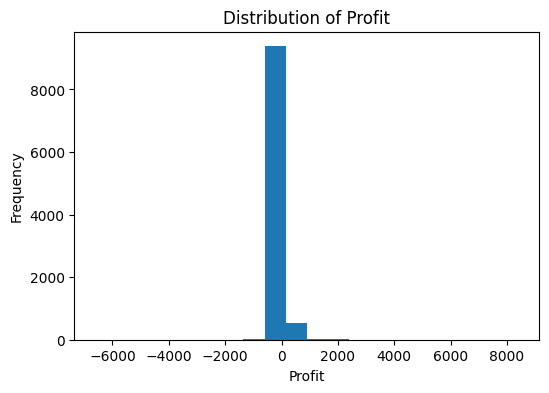

In [58]:
 # Histogram – Distribution of a numerical column

plt.figure(figsize=(6,4))
plt.hist(df['SALES'], bins=20)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df['PROFIT'], bins=20)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()




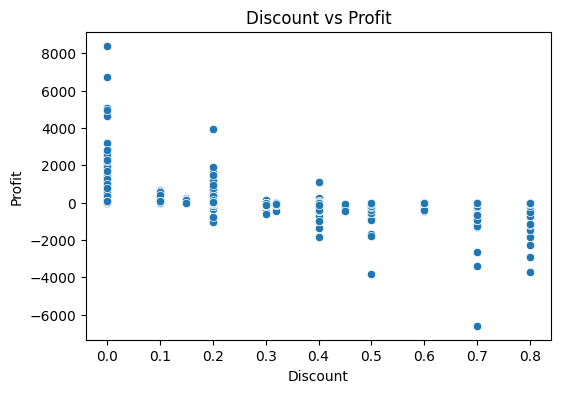

In [23]:
#Scatter Plot – Relationship between two variables
plt.figure(figsize=(6,4))
sns.scatterplot(x='DISCOUNT', y='PROFIT', data=df)
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()
